In [28]:
import pickle
from umap import UMAP
from embeddings.openai_api import get_embedding as openai_embedding
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from embeddings.embedding_utils import get_queries,get_query_key, to_full_name


In [29]:
embedding_to_visualize = openai_embedding
data_querries = get_queries()
category = list(data_querries.keys())[0]
query = data_querries[category][1]
query_key = get_query_key(category,query)

In [30]:
filename = f"{embedding_to_visualize.__module__.split('.')[-1]}__{embedding_to_visualize.__name__}/{query_key}.pkl"
with open(filename, "rb") as f:
    data_dict = pickle.load(f)
embeddings, numerical_labels, categorizer = data_dict["embeddings"], data_dict["numerical_labels"], data_dict["categorizer"]

In [31]:
embeddings_2d = UMAP(n_components=2).fit_transform(embeddings)
embeddings_3d = UMAP(n_components=3).fit_transform(embeddings)

C:\bachelor\article-clustering\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\bachelor\article-clustering\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [32]:
category_frequency = {}
for category_list in numerical_labels:
    for category in category_list:
        category_frequency[category] = category_frequency.get(category, 0) + 1
sorted_categories = sorted(category_frequency.items(), key=lambda x: x[1], reverse=True)
top_n = 6
top_categories = [category for category, _ in sorted_categories[:top_n]]
top_category_names = [to_full_name(categorizer.get_label_str(category)) for category in top_categories]
top_category_masks = [np.array([top_category in category_list for category_list in numerical_labels]) for top_category in top_categories]

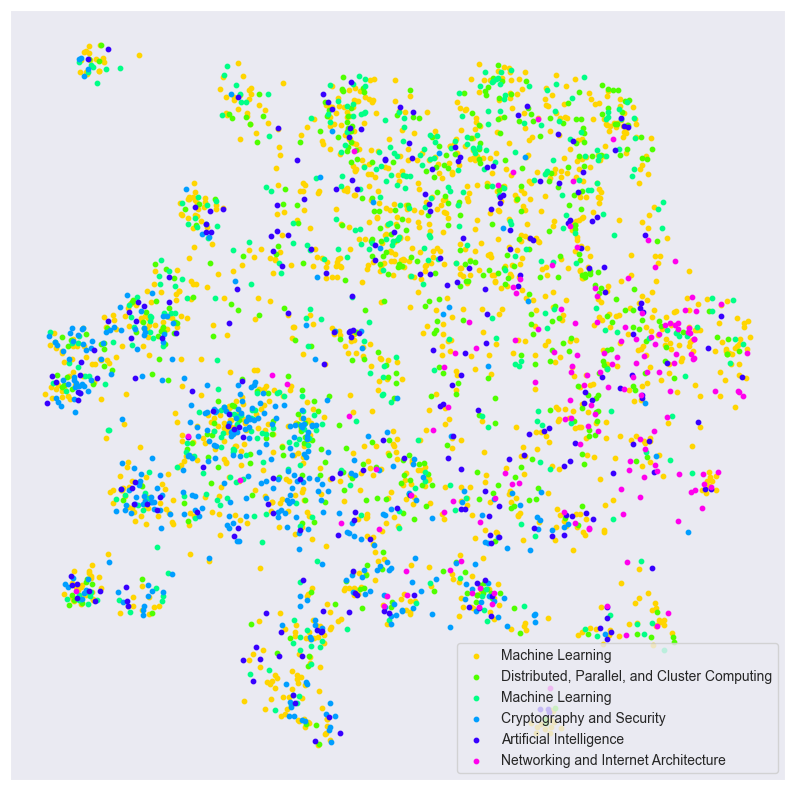

In [62]:
# 2d
plt.figure(figsize=(10,10))
colors = sns.color_palette("hsv", top_n)

plt.grid(False)

for i,(name, mask) in enumerate(zip(top_category_names, top_category_masks)):
    rand_factor=0.3
    plt.scatter(
        embeddings_2d[mask, 0]+rand_factor*np.random.rand(*embeddings_2d[mask, 0].shape),
        embeddings_2d[mask, 1]+rand_factor*np.random.rand(*embeddings_2d[mask, 1].shape),
        color=colors[i],
        label=name,
        s=10
    )

# Remove tick marks from all axes
plt.xticks([])
plt.yticks([])

plt.legend()
plt.savefig(f"{embedding_to_visualize.__module__.split('.')[-1]}__{embedding_to_visualize.__name__}/{query_key}.png", dpi=300, bbox_inches='tight')
plt.show()

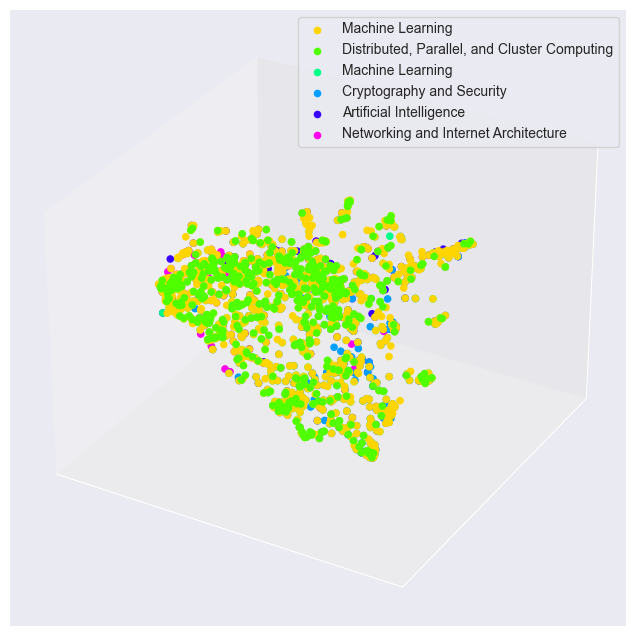

In [46]:
# 3d
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

colors = sns.color_palette("hsv", top_n)

for i,(name, mask) in enumerate(zip(top_category_names, top_category_masks)):
    ax.scatter(
        embeddings_3d[mask, 0],
        embeddings_3d[mask, 1],
        embeddings_3d[mask, 2],
        color=colors[i],
        label=name,
        alpha=1
    )

# Remove tick marks from all axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.legend()
# plt.savefig(f"{figure_path}/document_embedding_with_original_categories_3d.png", dpi=300, bbox_inches='tight')
plt.show()